In [2]:
import sys
import numpy as np
import xarray as xr
import dask.array as da
import numpy.ma as ma
from netCDF4 import Dataset

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm

import cartopy.crs as ccrs
import matplotlib.ticker as mticker

import cartopy
import cmocean

from decimal import Decimal

%matplotlib inline

In [3]:
def one_plot_cont_natl60_noblack0(ax,freq,var,var2,varname,vmin,vmax,cmap):
    ds=xr.open_dataset('/Users/auraoupa/Data/eNATL60/res_harm_ssh_0-360.nc',chunks={'x':1000,'y':1000})
    lat=ds['nav_lat']
    lon=ds['nav_lon']
    amp=ds[var]
    ph=ds[var2]
    
    ph360=da.where(ph<0,ph+360,ph)
    
    ax.coastlines(resolution="10m")

    ax.set_extent([-100,50,0,60])

    gl = ax.gridlines(crs=pj, draw_labels=True, linewidth=1, color='black', alpha=0.2, linestyle='--')
    label_style= {'size' : 12, 'color' : 'black'}
    gl.xlabel_style = label_style
    gl.xlabels_top = False
    gl.xlocator = mticker.FixedLocator(np.arange(-110,100,20,dtype=float))
    gl.ylabel_style = label_style
    gl.ylabels_right = False
    gl.ylocator = mticker.FixedLocator(np.arange(-20,90,10,dtype=float))
    cs = plt.pcolormesh(lon, lat, amp,transform=ccrs.PlateCarree(),cmap=cmap,vmin=vmin,vmax=vmax)
#    plt.contour(lon,lat,ph,[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180],cmap=cmocean.cm.phase,linestyle='solid',linewidths=1,transform=ccrs.PlateCarree())
    plt.contour(lon,lat,ph360,[30,60,90,120,150,180,210,240,270,300,330],cmap=cmocean.cm.phase,linestyle='solid',linewidths=1,transform=ccrs.PlateCarree())
#    plt.contour(lon,lat,ph360,[1],colors='k',linestyle='solid',linewidths=1,transform=ccrs.PlateCarree())

    plt.title(freq+' '+varname+' eNATL60')
    cbar = plt.colorbar(cs,orientation='horizontal',shrink=0.75,label='m')
    

/Users/auraoupa/anaconda2/envs/pangeo-cloud/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less
  return func(*args2)
/Users/auraoupa/anaconda2/envs/pangeo-cloud/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linestyle'
  s)


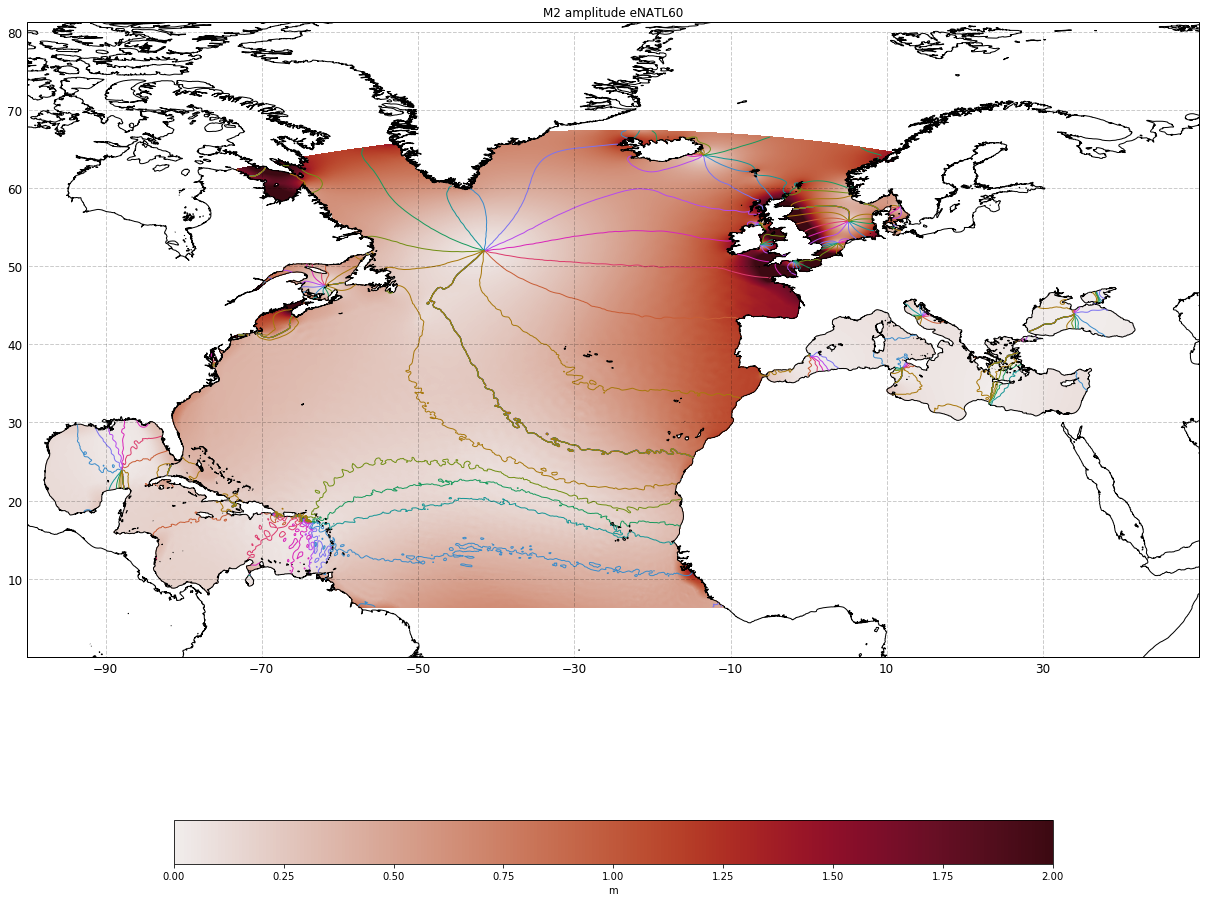

In [4]:
cmap='cmo.amp'
matplotlib.rcParams['contour.negative_linestyle']= 'solid'
matplotlib.rcParams['lines.linewidth']= 2

fig=plt.figure(figsize=(21,20))
pj= ccrs.PlateCarree()

ax=plt.subplot(1,1,1,projection=pj)
one_plot_cont_natl60_noblack0(ax,'M2','M2_A','M2_G','amplitude',0,2,cmap)

plt.savefig('maps_amp_phi_M2_eNATL60_noblack0'+str(cmap)+'.png')

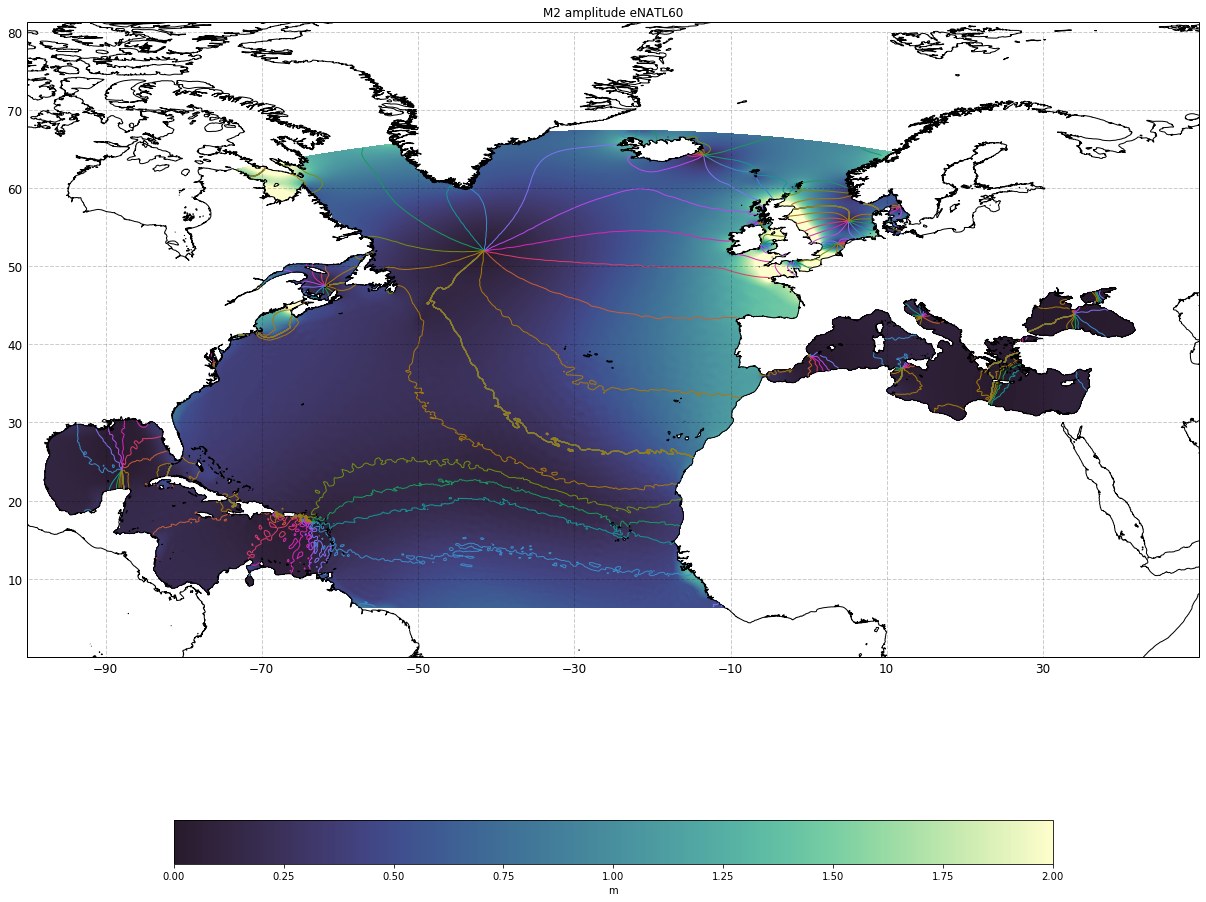

In [5]:
cmap='cmo.deep_r'
matplotlib.rcParams['contour.negative_linestyle']= 'solid'
matplotlib.rcParams['lines.linewidth']= 2

fig=plt.figure(figsize=(21,20))
pj= ccrs.PlateCarree()

ax=plt.subplot(1,1,1,projection=pj)
one_plot_cont_natl60_noblack0(ax,'M2','M2_A','M2_G','amplitude',0,2,cmap)

plt.savefig('maps_amp_phi_M2_eNATL60_noblack0'+str(cmap)+'.png')

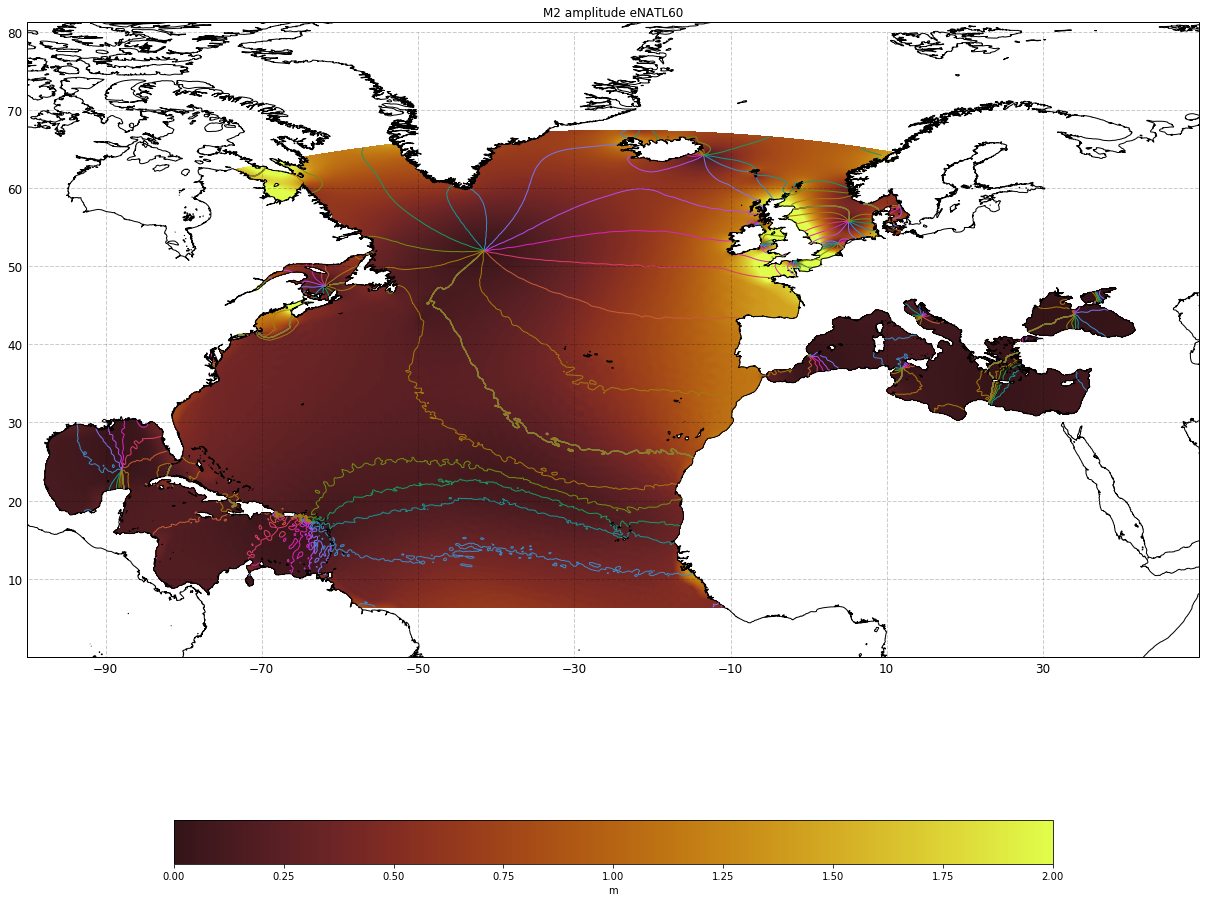

In [6]:
cmap='cmo.solar'
matplotlib.rcParams['contour.negative_linestyle']= 'solid'
matplotlib.rcParams['lines.linewidth']= 2

fig=plt.figure(figsize=(21,20))
pj= ccrs.PlateCarree()

ax=plt.subplot(1,1,1,projection=pj)
one_plot_cont_natl60_noblack0(ax,'M2','M2_A','M2_G','amplitude',0,2,cmap)

plt.savefig('maps_amp_phi_M2_eNATL60_noblack0'+str(cmap)+'.png')